# Describe Data

In [2]:
from __future__ import division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Import packages and read data
bank = pd.read_csv("C:/Users/akabo/Downloads/intro to business analysis/Final Project/Bank_Personal_Loan_Modelling.csv")

In [4]:
# No missing data
print(bank.info())

# No duplicated data
print(sum(bank.duplicated()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None
0


In [5]:
#First few rows of data
bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
#number of columns and rows
bank.shape

(5000, 14)

In [7]:
bank.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [8]:
bank.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [9]:
# Binary categories: target variable personal loan, also securities account, CD account, online banking and credit card. 

# Personal loan - Did this customer accept the personal loan offered in the last campaign? This is our target variable
print(bank['Personal Loan'].value_counts(dropna = False))

# Securities Account - Does the customer have a securities account with the bank?
print(bank['Securities Account'].value_counts(dropna = False))

# CD Account - Does the customer have a certificate of deposit (CD) account with the bank?
print(bank['CD Account'].value_counts(dropna = False))

# Online - Does the customer use internet banking facilities?
print(bank['Online'].value_counts(dropna = False))

# Credit Card - Does the customer use a credit card issued by UniversalBank?
print(bank['CreditCard'].value_counts(dropna = False))

0    4520
1     480
Name: Personal Loan, dtype: int64
0    4478
1     522
Name: Securities Account, dtype: int64
0    4698
1     302
Name: CD Account, dtype: int64
1    2984
0    2016
Name: Online, dtype: int64
0    3530
1    1470
Name: CreditCard, dtype: int64


In [10]:
bank["Personal Loan"].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

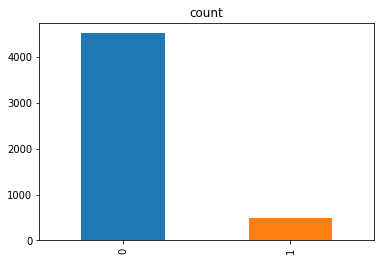

In [14]:
count = bank["Personal Loan"].value_counts()
count.plot(kind = "bar", title = "count")


# Data Cleaning

In [16]:
#Deal with negative values in Experience
bank_Age = bank[bank.Experience >= 0].groupby('Age').Experience.median().to_frame('Experience Median').reindex()

bank = pd.merge(bank, bank_Age, on = "Age", how = "left")

# Cleaning
bank.loc[bank.Experience < 0, 'Experience'] = np.round(bank['Experience Median'])

# 23 years old == null
bank.loc[bank.Experience.isnull(), 'Experience'] = 0


In [17]:
# ZIP Code
bank['ZIP Code'] = bank['ZIP Code'].astype(str)
bank['Area'] = bank['ZIP Code'].str.slice(0, 3)
bank['Area'] = bank['Area'].astype('category')
bank['ZIP Code'] = bank['ZIP Code'].astype('category')

In [18]:
# Education, Online, Credit Card
bank['Education'] = bank['Education'].astype('category')
bank['Family'] = bank['Family'].astype('category')

In [19]:
bank.dtypes

ID                        int64
Age                       int64
Experience              float64
Income                    int64
ZIP Code               category
Family                 category
CCAvg                   float64
Education              category
Mortgage                  int64
Personal Loan             int64
Securities Account        int64
CD Account                int64
Online                    int64
CreditCard                int64
Experience Median_x     float64
Experience Median_y     float64
Experience Median       float64
Area                   category
dtype: object

# Correlation

,ID,Age,Experience,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Experience Median_x,Experience Median_y,Experience Median
ID,1.000000,-0.008473,-0.008152,-0.017695,-0.024675,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028,-0.007634,-0.008719,-0.008719
Age,-0.008473,1.000000,0.994214,-0.055269,-0.052012,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681,0.999842,0.999807,0.999807
Experience,-0.008152,0.994214,1.000000,-0.046880,-0.050030,-0.010950,-0.008060,-0.001258,0.009905,0.013765,0.009073,0.994223,0.994266,0.994266
Income,-0.017695,-0.055269,-0.046880,1.000000,0.645984,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385,-0.056227,-0.055345,-0.055345
CCAvg,-0.024675,-0.052012,-0.050030,0.645984,1.000000,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689,-0.050847,-0.051966,-0.051966
Mortgage,-0.013920,-0.012539,-0.010950,0.206806,0.109905,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231,-0.012130,-0.012717,-0.012717
Personal Loan,-0.024801,-0.007726,-0.008060,0.502462,0.366889,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802,-0.009459,-0.008030,-0.008030
Securities Account,-0.016972,-0.000436,-0.001258,-0.002616,0.015086,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028,0.000842,-0.000032,-0.000032
CD Account,-0.006909,0.008043,0.009905,0.169738,0.136534,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644,0.006565,0.007622,0.007622
Online,-0.002528,0.013702,0.013765,0.014206,-0.003611,-0.005995,0.006278,0.012627,0.175880,1.000000,0.004210,0.014242,0.013564,0.013564


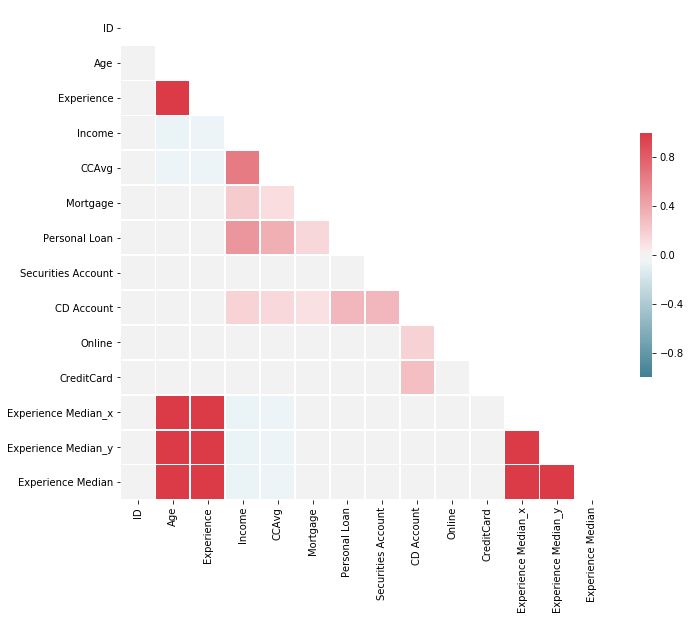

In [20]:
corr = bank.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

corr

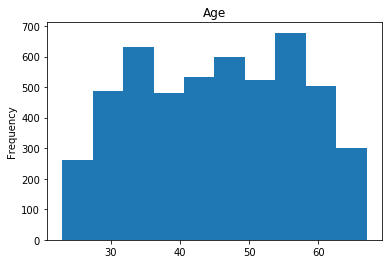

Empty DataFrame
Columns: [ID, Age, Experience, Income, ZIP Code, Family, CCAvg, Education, Mortgage, Personal Loan, Securities Account, CD Account, Online, CreditCard, Experience Median_x, Experience Median_y, Experience Median, Area]
Index: []
0


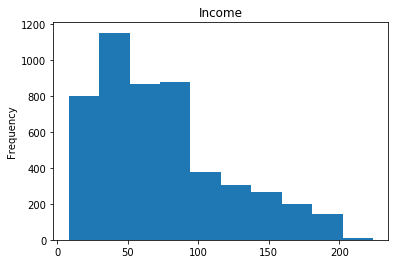

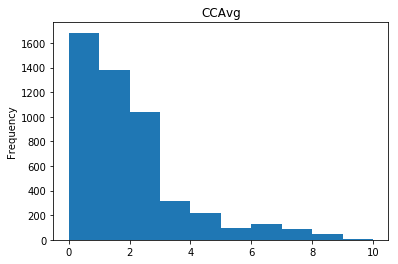

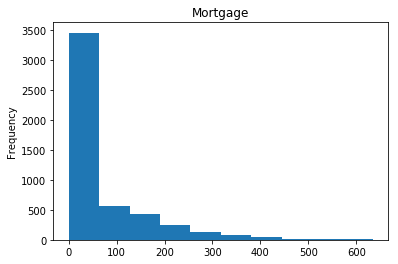

In [21]:
# Interval categories: age, experience, income, CC avg and mortgage.

# Age - ()
bank.Age.plot('hist')
plt.title("Age")
plt.show()

# Experience - Year of experience (negative - median)
print(bank.loc[bank.Experience < 0].head())
print(len(bank[bank.Experience < 0])) # 52

# Income - Annual income in dollars (which income, what the scale is?)
bank.Income.plot('hist')
plt.title("Income")
plt.show()

# CCAvg - Average credit card spending
bank['CCAvg'].plot('hist')
plt.title("CCAvg")
plt.show()

# Mortgage - Value of House Mortgage
bank['Mortgage'].plot('hist')
plt.title("Mortgage")
plt.show()

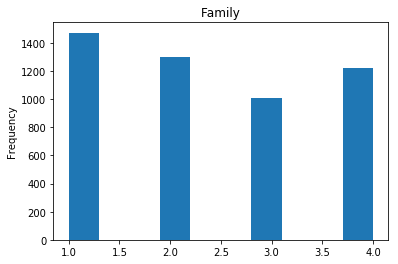

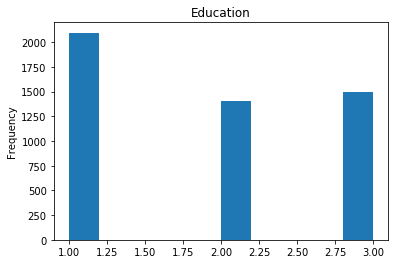

In [19]:
# Ordinal categories: family and education

# Family (mostly 1)
bank['Family'].plot('hist')
plt.title("Family")
plt.show()

# Education - Education level of the customer (mostly 1)
bank['Education'].plot('hist')
plt.title("Education")
plt.show()

# Data Cleaning

In [25]:
bank['Family'].values

[4, 3, 1, 1, 4, ..., 1, 4, 2, 3, 3]
Length: 5000
Categories (4, int64): [1, 2, 3, 4]

In [26]:
bank['Education'].values

[1, 1, 1, 2, 2, ..., 3, 1, 3, 2, 1]
Length: 5000
Categories (3, int64): [1, 2, 3]

In [36]:
familydummy = pd.get_dummies(bank['Family'], prefix='Family')
bank_family = pd.concat([bank, familydummy], axis=1)      
bank_family.drop(['Family_4'], inplace=True, axis=1)

In [37]:
edudummy =  pd.get_dummies(bank_family['Education'], prefix='Education')
bank_edu = pd.concat([bank_family, edudummy], axis=1)      
bank_edu.drop(['Education_3'], inplace=True, axis=1)

In [38]:
bank_edu.shape

(5000, 21)

In [39]:
bank_edu.describe()

,ID,Age,Experience,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Experience Median,Family_1,Family_2,Family_3,Education_1,Education_2
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,4988.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.12640,73.774200,1.937938,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000,20.383320,0.294400,0.259200,0.202000,0.419200,0.280600
std,1443.520003,11.463166,11.42918,46.033729,1.747659,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637,11.428289,0.455818,0.438239,0.401532,0.493478,0.449337
min,1.000000,23.000000,0.00000,8.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.00000,39.000000,0.700000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2500.500000,45.000000,20.00000,64.000000,1.500000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3750.250000,55.000000,30.00000,98.000000,2.500000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000,30.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,5000.000000,67.000000,43.00000,224.000000,10.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000,42.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
list(bank_edu.columns.values)

['ID',
 'Age',
 'Experience',
 'Income',
 'ZIP Code',
 'Family',
 'CCAvg',
 'Education',
 'Mortgage',
 'Personal Loan',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard',
 'Experience Median',
 'Area',
 'Family_1',
 'Family_2',
 'Family_3',
 'Education_1',
 'Education_2']

# Define Variables

In [55]:
x = bank_edu[['Age',
 'Income',
 'CCAvg',
 'Mortgage',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard',
 'Family_1',
 'Family_2',
 'Family_3',
 'Education_1',
 'Education_2']]

xtree = bank_edu[[ 'Age',
 'Income',
 'Family',
 'CCAvg',
 'Education',
 'Mortgage',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard',
 'Area']]
y = bank_edu["Personal Loan"]

In [56]:
# Split Data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0, stratify = y)
x_train.describe()

,Age,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Family_1,Family_2,Family_3,Education_1,Education_2
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.00000,3500.000000
mean,45.153143,73.515143,1.944043,55.966000,0.101714,0.058286,0.587143,0.299429,0.295143,0.256857,0.207143,0.42800,0.272286
std,11.468384,45.934519,1.756195,101.737513,0.302315,0.234316,0.492418,0.458073,0.456172,0.436962,0.405317,0.49486,0.445200
min,23.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,35.000000,39.000000,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,45.000000,64.000000,1.550000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,55.000000,98.000000,2.600000,100.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.00000,1.000000
max,67.000000,224.000000,10.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [57]:
xtree_train, xtree_test, y_train, y_test = train_test_split(xtree, y, test_size=0.30, random_state=0, stratify = y)
xtree_train.describe()

,Age,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,45.153143,73.515143,1.944043,55.966000,0.101714,0.058286,0.587143,0.299429
std,11.468384,45.934519,1.756195,101.737513,0.302315,0.234316,0.492418,0.458073
min,23.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,39.000000,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,64.000000,1.550000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,98.000000,2.600000,100.000000,0.000000,0.000000,1.000000,1.000000
max,67.000000,224.000000,10.000000,635.000000,1.000000,1.000000,1.000000,1.000000


# Model Building without Resampling

## Deciscion Tree

In [95]:
from sklearn.tree import export_graphviz
# If you don't have graphviz package, you need to install it https://anaconda.org/anaconda/graphviz
from IPython.display import Image
import graphviz 
from sklearn.metrics import confusion_matrix
import itertools

from sklearn import tree

import sklearn.grid_search as gs
from sklearn.tree import DecisionTreeClassifier # A decision tree classifier

gstree = gs.GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                                   param_grid= [{"criterion": ["gini", "entropy"],
                                                 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50],
                                                 "max_features": list(range(1, 11)),
                                                 'min_samples_leaf':[1,2,3,4,5],
                                                 'min_samples_split':[2,3,4,5]
                                                }],
                                   cv = 10,
                                   n_jobs = 4,
                                   scoring='accuracy')
gstree_fit = gstree.fit(xtree_train, y_train)
y_pred_tree = gstree_fit.predict(xtree_test)

## best parameter
print(gstree.best_params_)

## best estimator
print("Tree parameters: \n", gstree_fit.best_estimator_)

## best score
print("Best score: ", gstree.best_score_)

## The overall accuracy on the training set:
print("Training score: ", gstree.score(xtree_train, y_train))

## The overall accuracy on the test set:
print("Test accuracy: ", gstree.score(xtree_test, y_test))

{'criterion': 'gini', 'max_depth': 20, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 3}
Tree parameters: 
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')
Best score:  0.9848571428571429
Training score:  0.9988571428571429
Test accuracy:  0.9786666666666667


In [81]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

accuracy = sum(y_pred_tree == y_test)/len(y_test)
error = 1 - accuracy
print("The predictive accuracy is: ", round(accuracy, 2))
print("The classification error is: ", round(error, 2))
print(classification_report(y_test, y_pred_tree))

# Confusion matrix
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred_tree, labels = [0, 1])
print("The Confusion matrix: \n", cnf_matrix)

The predictive accuracy is:  0.98
The classification error is:  0.02
             precision    recall  f1-score   support

          0       0.99      0.99      0.99      1356
          1       0.89      0.89      0.89       144

avg / total       0.98      0.98      0.98      1500

The Confusion matrix: 
 [[1340   16]
 [  16  128]]


In [ ]:
from sklearn.model_selection import cross_val_score

scores_tree=cross_val_score(gstree, xtree_train, y_train, 
                         scoring='accuracy', cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores_tree),
                                      np.std(scores_tree)))

# KNN

In [68]:
# Standardize
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)
x_std = sc.transform(x)

In [69]:
from sklearn import neighbors, datasets
from sklearn.model_selection import GridSearchCV 

gsknn = GridSearchCV(estimator=neighbors.KNeighborsClassifier(p=2, 
                           metric='minkowski'),
                  param_grid=[{'n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
                               'weights':['uniform','distance']}],
                  scoring='accuracy',
                  cv=10,
                  n_jobs=4)

gsknn_fit = gsknn.fit(x_train_std, y_train)          
y_pred_knn = gsknn_fit.predict(x_test_std)

## best parameter
print(gsknn.best_params_)

## best estimator
print("KNN parameters: \n", gsknn_fit.best_estimator_)

## best score
print("Best score: ", gsknn.best_score_)

## The overall accuracy on the training set:
print("Training score: ", gsknn.score(x_train_std, y_train))

## The overall accuracy on the test set:
print("Test accuracy: ", gsknn.score(x_test_std, y_test))

{'n_neighbors': 1, 'weights': 'uniform'}
Tree parameters: 
 GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=4,
       param_grid=[{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21], 'weights': ['uniform', 'distance']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)
Best score:  0.9591428571428572
Training score:  1.0
Test accuracy:  0.966


In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

accuracy = sum(y_pred_knn == y_test)/len(y_test)
error = 1 - accuracy
print("The predictive accuracy is: ", round(accuracy, 2))
print("The classification error is: ", round(error, 2))
print(classification_report(y_test, y_pred_knn))

# Confusion matrix
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred_knn, labels = [0, 1])
print("The Confusion matrix: \n", cnf_matrix)

The predictive accuracy is:  0.97
The classification error is:  0.03
             precision    recall  f1-score   support

          0       0.98      0.99      0.98      1356
          1       0.87      0.76      0.81       144

avg / total       0.96      0.97      0.97      1500

The Confusion matrix: 
 [[1339   17]
 [  34  110]]


In [ ]:
scores_knn =cross_val_score(gsknn, x_train_std, y_train, 
                         scoring='accuracy', cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores_knn),
                                      np.std(scores_knn)))

## Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression 

gslr = GridSearchCV(estimator=LogisticRegression(random_state=0),
                  param_grid=[{'C': [ 0.00001, 0.0001, 0.001, 0.01, 0.1 ,1 ,10 ,100, 1000, 10000, 100000, 1000000, 10000000],
                             'penalty':['l1','l2']}],
                  scoring='accuracy',
                  cv=10)

gslr_fit = gslr.fit(x_train, y_train)          
y_pred_lr = gslr_fit.predict(x_test)

## best parameter
print(gsknn.best_params_)

## best estimator
print("Logistic parameters: \n", gslr_fit.best_estimator_)

## best score
print("Best score: ", gslr.best_score_)

## The overall accuracy on the training set:
print("Training score: ", gslr.score(x_train, y_train))

## The overall accuracy on the test set:
print("Test accuracy: ", gslr.score(x_test, y_test))

{'n_neighbors': 1, 'weights': 'uniform'}
Tree parameters: 
 GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=4,
       param_grid=[{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21], 'weights': ['uniform', 'distance']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)
Best score:  0.9591428571428572
Training score:  0.35428571428571426
Test accuracy:  0.33466666666666667


In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

accuracy = sum(y_pred_lr == y_test)/len(y_test)
error = 1 - accuracy
print("The predictive accuracy is: ", round(accuracy, 2))
print("The classification error is: ", round(error, 2))
print(classification_report(y_test, y_pred_lr))

# Confusion matrix
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred_lr, labels = [0, 1])
print("The Confusion matrix: \n", cnf_matrix)


The predictive accuracy is:  0.96
The classification error is:  0.04
             precision    recall  f1-score   support

          0       0.96      0.99      0.98      1356
          1       0.88      0.65      0.74       144

avg / total       0.96      0.96      0.95      1500

The Confusion matrix: 
 [[1343   13]
 [  51   93]]


In [ ]:
scores_lr =cross_val_score(gslr, x_train, y_train, 
                         scoring='accuracy', cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores_lr),
                                      np.std(scores_knn)))

## ROC Graph

In [ ]:
np.random.seed(0)

# Decision Tree Classifier
clf1 = DecisionTreeClassifier(max_depth=1,
                              criterion='entropy',
                              random_state=0)

# kNN Classifier
clf2 = KNeighborsClassifier(n_neighbors=1,
                            p=2,
                            metric='minkowski')

# Logistic Regression Classifier
clf3 = LogisticRegression(penalty='l2', 
                          C=0.01,
                          random_state=1)

# Label the classifiers
clf_labels = ['Decision tree',  'KNN', 'Logistic regression',]
all_clf = [clf1, clf2, clf3]

print('10-fold cross validation:\n')
for clf, label in zip([clf1, clf2, clf3], clf_labels): #For all classifiers 
    scores = cross_val_score(estimator=clf,  #Estimate AUC based on cross validation
                             X=X_train,
                             y=y_train,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]" #Print peformance statistics based on cross-validation
          % (scores.mean(), scores.std(), label))

colors = [ 'orange', 'blue', 'green']      #Colors for visualization
linestyles = [':', '--', '-.', '-']        #Line styles for visualization
for clf, label, clr, ls in zip(all_clf,
               clf_labels, colors, linestyles):

    # assuming the label of the positive class is 1 and data is normalized
    y_pred = clf.fit(X_train,
                     y_train).predict_proba(X_test)[:, 1] # Make predictions based on the classifiers
    fpr, tpr, thresholds = roc_curve(y_true=y_test, # Build ROC curve
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)                # Compute Area Under the Curve (AUC) 
    plt.plot(fpr, tpr,                         # Plot ROC Curve and create label with AUC values
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')    # Where to place the legend
plt.plot([0, 1], [0, 1], # Visualize random classifier
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])   #limits for x axis
plt.ylim([-0.1, 1.1])   #limits for y axis
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')


#plt.savefig('ROC_all_classifiers', dpi=300)
plt.show()

# Model Building with Resampling

In [83]:
from sklearn.utils import resample

x_train_resampled, y_train_resampled = resample(x_train[ y_train == 1],
                                    y_train[y_train == 1],
                                    replace=True, 
                                    n_samples=x_train[y_train == 0].shape[0], 
                                    random_state=0)

xtree_train_resampled, y_train_resampled = resample(xtree_train[y_train == 1],
                                    y_train[y_train == 1],
                                    replace=True, 
                                    n_samples=xtree_train[y_train == 0].shape[0], 
                                    random_state=0)

In [84]:
x_train_zero = x_train[y_train == 0]
x_train_resample = pd.concat([x_train_resampled, x_train_zero])

xtree_train_zero = xtree_train[y_train == 0]
xtree_train_resample = pd.concat([xtree_train_resampled, xtree_train_zero])

y_train_zero = y_train[y_train == 0]
y_train_resample = pd.concat([y_train_resampled, y_train_zero])

## Decision Tree (Resampling)

In [87]:
gstree_resample = gs.GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                                   param_grid= [{"criterion": ["gini", "entropy"],
                                                 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50],
                                                 "max_features": list(range(1, 11)),
                                                 'min_samples_leaf':[1,2,3,4,5],
                                                 'min_samples_split':[2,3,4,5]
                                                }],
                                   cv = 10,
                                   n_jobs = 4,
                                   scoring='accuracy')
gstree_resample_fit = gstree_resample.fit(xtree_train_resample, y_train_resample)
y_pred_tree_resample = gstree_resample_fit.predict(xtree_test)

## best parameter
print(gstree_resample.best_params_)

## best estimator
print("Tree parameters: \n", gstree_resample_fit.best_estimator_)

## best score
print("Best score: ", gstree_resample.best_score_)

## The overall accuracy on the training set:
print("Training score: ", gstree_resample.score(xtree_train_resample, y_train_resample))

## The overall accuracy on the test set:
print("Test accuracy: ", gstree_resample.score(xtree_test, y_test))

{'criterion': 'entropy', 'max_depth': 20, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Tree parameters: 
 GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=4,
       param_grid=[{'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50], 'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_leaf': [1, 2, 3, 4, 5], 'min_samples_split': [2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)
Best score:  0.9962073324905183
Training score:  1.0
Test accuracy:  0.9793333333333333


In [88]:
accuracy = sum(y_pred_tree == y_test)/len(y_test)
error = 1 - accuracy
print("The predictive accuracy is: ", round(accuracy, 2))
print("The classification error is: ", round(error, 2))
print(classification_report(y_test, y_pred_tree_resample))

# Confusion matrix
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred_tree_resample, labels = [0, 1])
print("The Confusion matrix: \n", cnf_matrix)

The predictive accuracy is:  0.98
The classification error is:  0.02
             precision    recall  f1-score   support

          0       0.99      0.99      0.99      1356
          1       0.89      0.90      0.89       144

avg / total       0.98      0.98      0.98      1500

The Confusion matrix: 
 [[1340   16]
 [  15  129]]


In [89]:
from sklearn.model_selection import cross_val_score

scores_tree_resample=cross_val_score(gstree, xtree_train_resample, y_train_resample, 
                         scoring='accuracy', cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores_tree), np.std(scores_tree)))

KeyboardInterrupt: 

## KNN (Resampling)

In [91]:
sc.fit(x_train_resample)
x_train_resample_std = sc.transform(x_train_resample)
x_test_std = sc.transform(x_test)

In [92]:
gsknn_resample = GridSearchCV(estimator=neighbors.KNeighborsClassifier(p=2, 
                           metric='minkowski'),
                  param_grid=[{'n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
                               'weights':['uniform','distance']}],
                  scoring='accuracy',
                  cv=10,
                  n_jobs=4)

gsknn_resample_fit = gsknn_resample.fit(x_train_resample_std, y_train_resample)          
y_pred_knn_resample = gsknn_resample_fit.predict(x_test_std)

## best parameter
print(gsknn_resample.best_params_)

## best estimator
print("KNN parameters: \n", gsknn_resample_fit.best_estimator_)

## best score
print("Best score: ", gsknn_resample.best_score_)

## The overall accuracy on the training set:
print("Training score: ", gsknn_resample.score(x_train_resample_std, y_train_resample))

## The overall accuracy on the test set:
print("Test accuracy: ", gsknn_resample.score(x_test_std, y_test))

{'n_neighbors': 1, 'weights': 'uniform'}
Tree parameters: 
 GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=4,
       param_grid=[{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21], 'weights': ['uniform', 'distance']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)
Best score:  0.9941529709228825
Training score:  1.0
Test accuracy:  0.964


In [93]:
accuracy = sum(y_pred_knn_resample == y_test)/len(y_test)
error = 1 - accuracy
print("The predictive accuracy is: ", round(accuracy, 2))
print("The classification error is: ", round(error, 2))
print(classification_report(y_test, y_pred_knn_resample))

# Confusion matrix
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred_knn_resample, labels = [0, 1])
print("The Confusion matrix: \n", cnf_matrix)

The predictive accuracy is:  0.96
The classification error is:  0.04
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      1356
          1       0.87      0.74      0.80       144

avg / total       0.96      0.96      0.96      1500

The Confusion matrix: 
 [[1340   16]
 [  38  106]]


In [ ]:
scores_knn_resample =cross_val_score(gsknn_resample, x_train_resample_std, y_train, 
                         scoring='accuracy', cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores_knn), np.std(scores_knn)))

## Logistic Regression (Resampling)

In [97]:
gslr_resample = GridSearchCV(estimator=LogisticRegression(random_state=0),
                  param_grid=[{'C': [ 0.00001, 0.0001, 0.001, 0.01, 0.1 ,1 ,10 ,100, 1000, 10000, 100000, 1000000, 10000000],
                             'penalty':['l1','l2']}],
                  scoring='accuracy',
                  cv=10)

gslr_resample_fit = gslr_resample.fit(x_train_resample, y_train_resample)          
y_pred_lr_resample = gslr_resample_fit.predict(x_test)

## best parameter
print(gslr_resample.best_params_)

## best estimator
print("Logistic parameters: \n", gslr_resample_fit.best_estimator_)

## best score
print("Best score: ", gslr_resample.best_score_)

## The overall accuracy on the training set:
print("Training score: ", gslr_resample.score(x_train, y_train))

## The overall accuracy on the test set:
print("Test accuracy: ", gslr_resample.score(x_test, y_test))

{'C': 0.1, 'penalty': 'l1'}
Logistic parameters: 
 LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Best score:  0.9056573957016435
Training score:  0.9068571428571428
Test accuracy:  0.9086666666666666


In [98]:
accuracy = sum(y_pred_lr_resample == y_test)/len(y_test)
error = 1 - accuracy
print("The predictive accuracy is: ", round(accuracy, 2))
print("The classification error is: ", round(error, 2))
print(classification_report(y_test, y_pred_lr_resample))

# Confusion matrix
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred_lr_resample, labels = [0, 1])
print("The Confusion matrix: \n", cnf_matrix)

The predictive accuracy is:  0.91
The classification error is:  0.09
             precision    recall  f1-score   support

          0       0.99      0.91      0.95      1356
          1       0.51      0.91      0.66       144

avg / total       0.94      0.91      0.92      1500

The Confusion matrix: 
 [[1232  124]
 [  13  131]]


In [ ]:
scores_lr_resample =cross_val_score(gslr_resample, x_train_resample, y_train, 
                         scoring='accuracy', cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores_knn), np.std(scores_knn)))

## ROC Graph

In [ ]:
np.random.seed(0)

# Decision Tree Classifier
clf1 = DecisionTreeClassifier(max_depth=1,
                              criterion='entropy',
                              random_state=0)

# kNN Classifier
clf2 = KNeighborsClassifier(n_neighbors=5,
                            p=2,
                            metric='minkowski')

# Logistic Regression Classifier
clf3 = LogisticRegression(penalty='l2', 
                          C=0.01,
                          random_state=1)

# Label the classifiers
clf_labels = ['Decision tree',  'KNN', 'Logistic regression',]
all_clf = [clf1, clf2, clf3]

print('10-fold cross validation:\n')
for clf, label in zip([clf1, clf2, clf3], clf_labels): #For all classifiers 
    scores = cross_val_score(estimator=clf,  #Estimate AUC based on cross validation
                             X=X_train,
                             y=y_train,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]" #Print peformance statistics based on cross-validation
          % (scores.mean(), scores.std(), label))

colors = [ 'orange', 'blue', 'green']      #Colors for visualization
linestyles = [':', '--', '-.', '-']        #Line styles for visualization
for clf, label, clr, ls in zip(all_clf,
               clf_labels, colors, linestyles):

    # assuming the label of the positive class is 1 and data is normalized
    y_pred = clf.fit(X_train,
                     y_train).predict_proba(X_test)[:, 1] # Make predictions based on the classifiers
    fpr, tpr, thresholds = roc_curve(y_true=y_test, # Build ROC curve
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)                # Compute Area Under the Curve (AUC) 
    plt.plot(fpr, tpr,                         # Plot ROC Curve and create label with AUC values
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')    # Where to place the legend
plt.plot([0, 1], [0, 1], # Visualize random classifier
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])   #limits for x axis
plt.ylim([-0.1, 1.1])   #limits for y axis
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')


#plt.savefig('ROC_all_classifiers', dpi=300)
plt.show()